## Libraries.

In [135]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data frame creation.

In [136]:
# Import data from CSV into a data frame.
supermarket_df = pd.read_csv("data/supermarket_Sales.csv")

# Print first five rows of data.
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


This data comes from a supermarket chain in Myanmar.

## Data description.

In [137]:
# Get the total amount of rows and columns.
print("Rows: {}\nColumns: {}".format(supermarket_df.shape[0], supermarket_df.shape[1]))

# Get the data types of all columns.
print("\nData types:\n{}".format(supermarket_df.dtypes))

# Identify null values.
print("\nNull values:\n{}".format(supermarket_df.isnull().any()))

# Identify duplicated rows.
print("\nDuplicated rows?: {}\n".format(supermarket_df.duplicated().any()))

# Identify duplicated columns.
for column in supermarket_df.columns: 
    print("Duplicated values at column '{}'?: {}".format(column, supermarket_df[column].duplicated().any()))

Rows: 1000
Columns: 17

Data types:
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                               object
Payment                            object
Cost of goods sold                float64
Gross margin percentage           float64
Gross income                      float64
Customer stratification rating    float64
dtype: object

Null values:
Invoice ID                        False
Branch                            False
City                              False
Customer type                     False
Gender                            False
Product line          

There are no missing values, no duplicated rows and the only column without duplicates is the 'Invoice ID' column (as expected, as it only contains an identifier for each row).

## Data transformation.

In [138]:
# Combine date and time columns.
supermarket_df['Datetime'] = supermarket_df['Date'] + " " + supermarket_df['Time']

# See new column
supermarket_df[['Datetime']].head()

,Datetime
0,1/5/2019 13:08
1,3/8/2019 10:29
2,3/3/2019 13:23
3,1/27/2019 20:33
4,2/8/2019 10:37


In [139]:
# Change 'Datetime' column data type.
supermarket_df['Datetime'] = pd.to_datetime(supermarket_df['Datetime'], format = '%m/%d/%Y %H:%M')

# Verify data type change.
supermarket_df.dtypes

Invoice ID                                object
Branch                                    object
City                                      object
Customer type                             object
Gender                                    object
Product line                              object
Unit price                               float64
Quantity                                   int64
Tax 5%                                   float64
Total                                    float64
Date                                      object
Time                                      object
Payment                                   object
Cost of goods sold                       float64
Gross margin percentage                  float64
Gross income                             float64
Customer stratification rating           float64
Datetime                          datetime64[ns]
dtype: object

In [140]:
# Add new date columns for future segmentation.
supermarket_df['Year'] = supermarket_df['Datetime'].dt.year                 # Year
supermarket_df['Month'] = supermarket_df['Datetime'].dt.month_name()        # Month name
supermarket_df['Weekday name'] = supermarket_df['Datetime'].dt.day_name()   # Day name
supermarket_df['Hour'] = supermarket_df['Datetime'].dt.hour         # Hour

# See new columns.
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating,Datetime,Year,Month,Weekday name,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,February,Friday,10


In [141]:
# Add time-related columns for further segmentation.
supermarket_df['Time of the day'] = supermarket_df['Hour'].apply(lambda x: 'Morning' if x >= 8 and x < 12 else 'Afternoon' if x >= 12 and x < 18 else 'Evening')

# See the new columns.
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating,Datetime,Year,Month,Weekday name,Hour,Time of the day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,January,Saturday,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019,March,Friday,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,March,Sunday,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,January,Sunday,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,February,Friday,10,Morning


In [142]:
# Drop innecessary columns.
supermarket_df = supermarket_df.drop(columns = ['Invoice ID', 'Date', 'Time'])

# See the changes.
supermarket_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating,Datetime,Year,Month,Weekday name,Hour,Time of the day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,January,Saturday,13,Afternoon
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019,March,Friday,10,Morning
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,March,Sunday,13,Afternoon
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,January,Sunday,20,Evening
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,February,Friday,10,Morning


In [143]:
# See total locations in city and branches per city.
for city in supermarket_df['City'].unique():
    print('City: {}\nLocations count: {}\nBranches: {}\n'.format(city, 
                                                                 int(supermarket_df[supermarket_df['City'] == city].count()['Branch']), 
                                                                 supermarket_df[supermarket_df['City'] == city]['Branch'].unique()))

City: Yangon
Locations count: 340
Branches: ['A']

City: Naypyitaw
Locations count: 328
Branches: ['C']

City: Mandalay
Locations count: 332
Branches: ['B']



There's only one branch per city, so it's possible to get rid of one of the two columns. So, I'll be dropping the 'Branch' column, as I don't consider it necessary for the data analysis process.

In [144]:
# Add geographical information.
supermarket_df['Country'] = 'Myanmar'
supermarket_df['Latitude'] = supermarket_df['City'].apply(lambda x: 16.80528000 if x == 'Yangon' else 19.74500000 if x == 'Naypyitaw' else 21.97473000 )
supermarket_df['Longitude'] = supermarket_df['City'].apply(lambda x: 96.15611000 if x == 'Yangon' else 96.12972000 if x == 'Naypyitaw' else 96.08359000)

In [145]:
# Drop the 'Branch' column.
supermarket_df = supermarket_df.drop(columns = ['Branch'])

# See the changes.
supermarket_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Cost of goods sold,...,Customer stratification rating,Datetime,Year,Month,Weekday name,Hour,Time of the day,Country,Latitude,Longitude
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,...,9.1,2019-01-05 13:08:00,2019,January,Saturday,13,Afternoon,Myanmar,16.80528,96.15611
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,...,9.6,2019-03-08 10:29:00,2019,March,Friday,10,Morning,Myanmar,19.74500,96.12972
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,...,7.4,2019-03-03 13:23:00,2019,March,Sunday,13,Afternoon,Myanmar,16.80528,96.15611
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,...,8.4,2019-01-27 20:33:00,2019,January,Sunday,20,Evening,Myanmar,16.80528,96.15611
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,...,5.3,2019-02-08 10:37:00,2019,February,Friday,10,Morning,Myanmar,16.80528,96.15611


In [146]:
# Get column names for data reordering.
supermarket_df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Payment', 'Cost of goods sold',
       'Gross margin percentage', 'Gross income',
       'Customer stratification rating', 'Datetime', 'Year', 'Month',
       'Weekday name', 'Hour', 'Time of the day', 'Country', 'Latitude',
       'Longitude'],
      dtype='object')

In [147]:
# Reorder data.
supermarket_df = supermarket_df[['Country', 'City', 'Latitude', 'Longitude', 'Customer type', 'Gender', 'Product line', 'Unit price',
                                 'Quantity', 'Tax 5%', 'Total', 'Payment', 'Cost of goods sold', 'Gross margin percentage', 'Gross income',
                                 'Customer stratification rating', 'Datetime', 'Year', 'Month', 'Weekday name', 'Hour', 'Time of the day']]

# See new data order.
supermarket_df.head()

,Country,City,Latitude,Longitude,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating,Datetime,Year,Month,Weekday name,Hour,Time of the day
0,Myanmar,Yangon,16.80528,96.15611,Member,Female,Health and beauty,74.69,7,26.1415,...,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,January,Saturday,13,Afternoon
1,Myanmar,Naypyitaw,19.74500,96.12972,Normal,Female,Electronic accessories,15.28,5,3.8200,...,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019,March,Friday,10,Morning
2,Myanmar,Yangon,16.80528,96.15611,Normal,Male,Home and lifestyle,46.33,7,16.2155,...,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,March,Sunday,13,Afternoon
3,Myanmar,Yangon,16.80528,96.15611,Member,Male,Health and beauty,58.22,8,23.2880,...,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,January,Sunday,20,Evening
4,Myanmar,Yangon,16.80528,96.15611,Normal,Male,Sports and travel,86.31,7,30.2085,...,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,February,Friday,10,Morning


## Data analysis.

### Descriptive statistics

In [148]:
# Describe the numeric data.
supermarket_df.describe()

,Latitude,Longitude,Unit price,Quantity,Tax 5%,Total,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating,Datetime,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000,1000.0,1000.000000
mean,19.485766,96.123377,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,2019-02-14 15:30:27.480000,2019.0,14.910000
min,16.805280,96.083590,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,2019-01-01 10:39:00,2019.0,10.000000
25%,16.805280,96.083590,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,2019-01-24 17:58:45,2019.0,12.000000
50%,19.745000,96.129720,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2019-02-13 17:37:00,2019.0,15.000000
75%,21.974730,96.156110,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,2019-03-08 15:29:30,2019.0,18.000000
max,21.974730,96.156110,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,2019-03-30 20:37:00,2019.0,20.000000
std,2.127485,0.030066,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,NaN,0.0,3.186857


In [149]:
# Describe the categorical data.
supermarket_df.describe(include = ['O'])

,Country,City,Customer type,Gender,Product line,Payment,Month,Weekday name,Time of the day
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,3,2,2,6,3,3,7,3
top,Myanmar,Yangon,Member,Female,Fashion accessories,Ewallet,January,Saturday,Afternoon
freq,1000,340,501,501,178,345,352,164,528


As we can see, most clients are members, women, buy fashion accesories and pay through e-wallet. Most clients buy are from or buy in Yangon, during Saturday afternoon. A client buys, on average, 5 items and spends on them around 307 Kyats. The store gains around 4% per customer purchase, and the customer satisfaction is around 6.9/10. Also, most clients come around 2 and 3 PM. This could be enough to create a customer profile, however, we could obtain more information from our data.

### Variable distribution analysis.

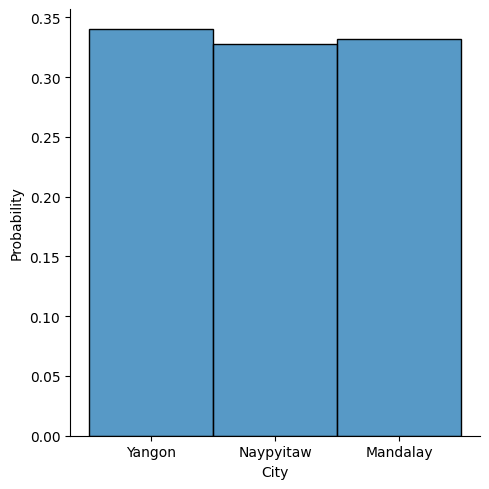

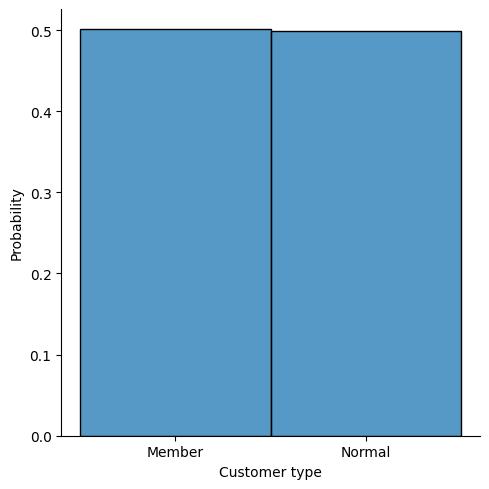

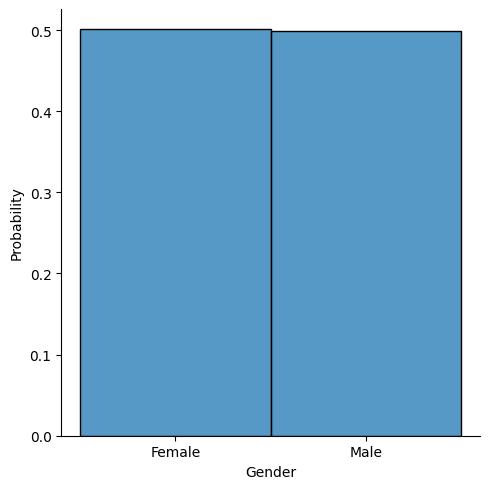

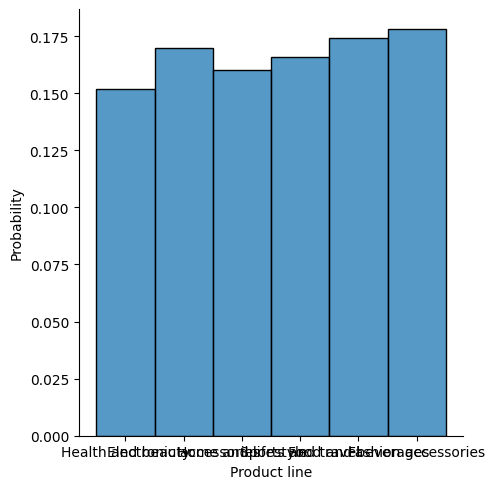

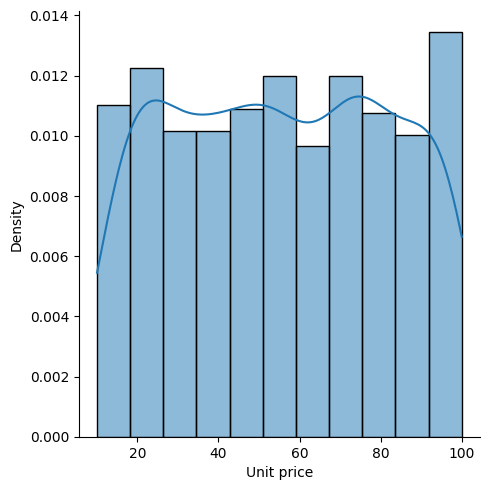

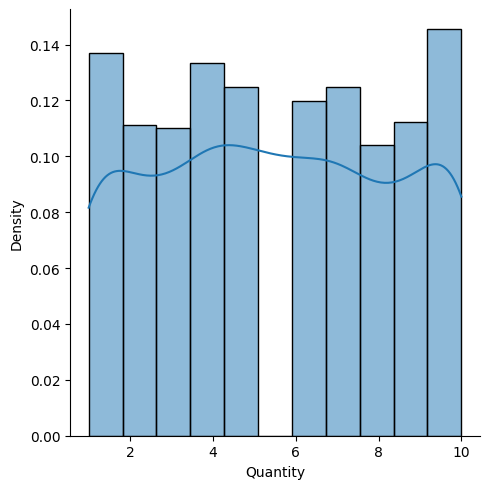

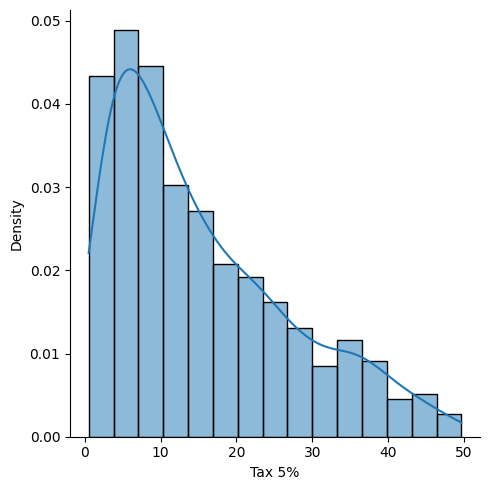

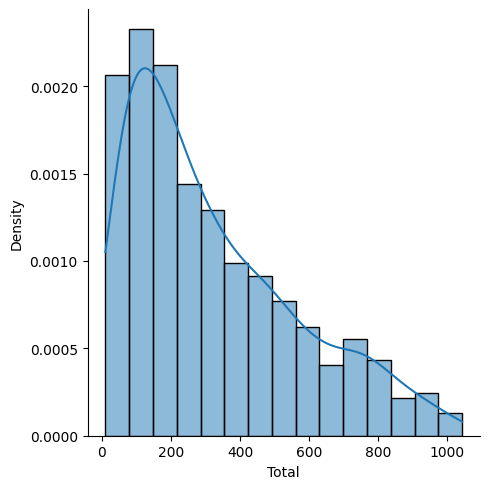

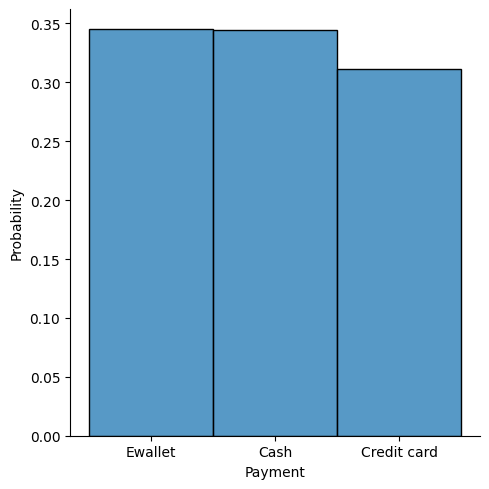

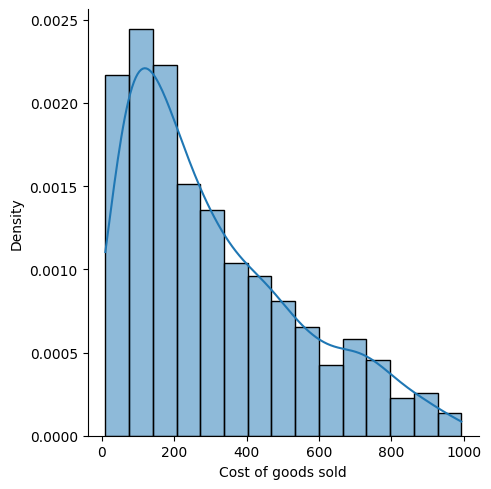

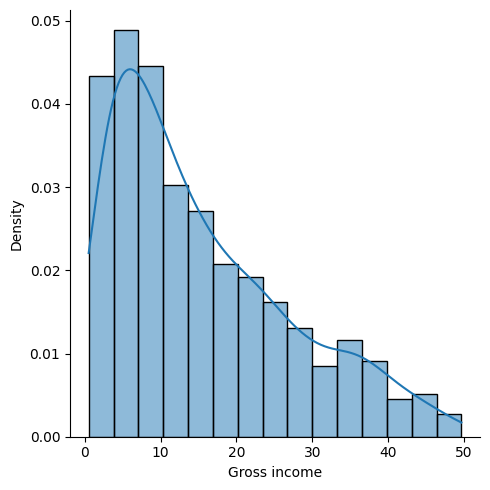

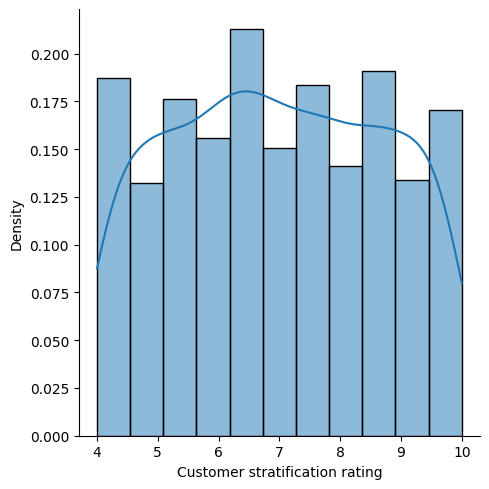

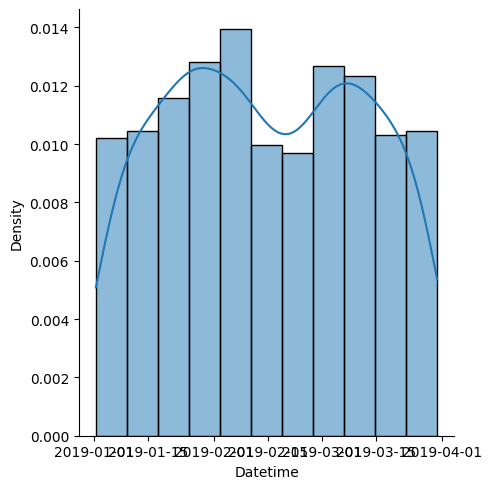

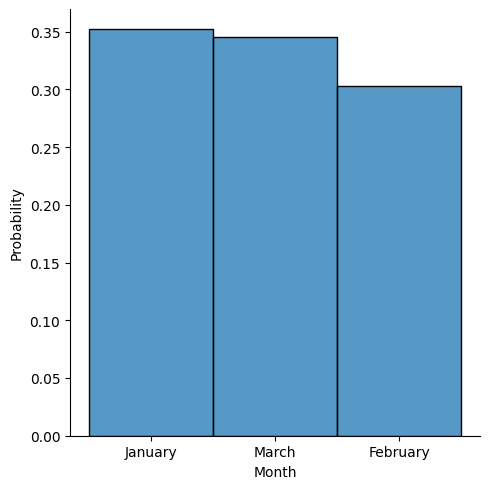

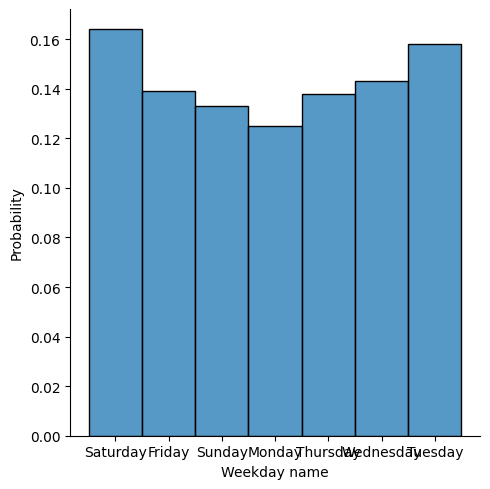

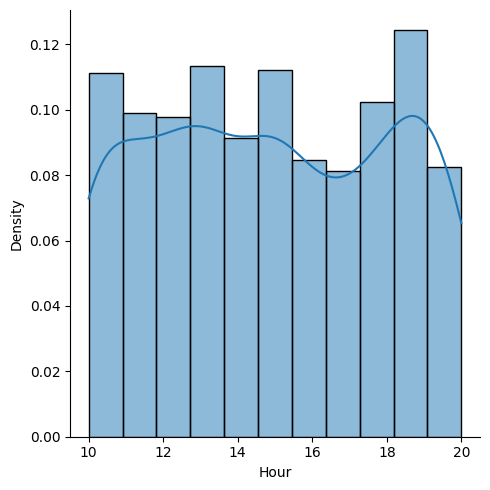

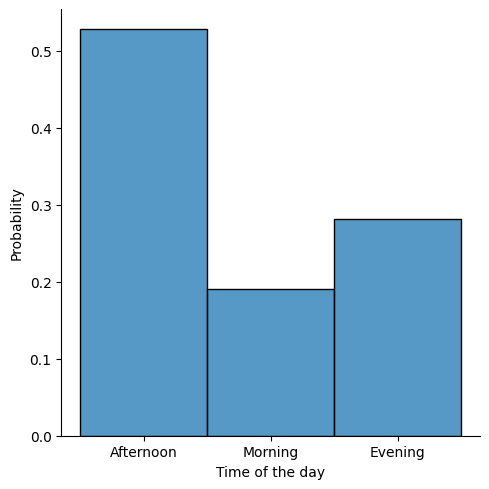

In [150]:
# Graph every column.
for i in range(len(supermarket_df.columns)):
     # Create histogram depending on variable type.
    if supermarket_df[supermarket_df.columns[i]].dtype == 'O' and supermarket_df.columns[i] not in ['Latitude', 'Longitude', 'Year', 'Gross margin percentage', 'Country'] :
        sns.displot(supermarket_df[supermarket_df.columns[i]], stat = "probability")
    elif supermarket_df.columns[i] not in ['Latitude', 'Longitude', 'Year', 'Gross margin percentage', 'Country']:
        sns.displot(supermarket_df[supermarket_df.columns[i]], kde = True, stat = "density") 
   

In [151]:
# test
import os

if os.path.exists("results") is False:
    os.mkdir("results")
supermarket_df.to_excel("results/supermarket_sales_transformed.xlsx")